In [5]:

import pandas as pd
# Load the modified dataset
file_path_modified = 'customer_behavior_with_padded_search_queries.csv'
data_recommendation = pd.read_csv(file_path_modified)
# Display the first few rows of the dataset
data_recommendation.head()


,customer_id,product_id,purchase_date,purchase_amount,rating,review,search_queries
0,1,1,2024-01-15,975.130452,5,Excellent product,apple iphone
1,1,1,2024-01-15,1031.919341,5,Excellent product,adidas sneakers
2,1,1,2024-01-15,1007.158262,5,Excellent product,fitbit charge
3,1,1,2024-01-15,1017.150096,5,Excellent product,smart tv
4,1,1,2024-01-15,990.221904,5,Excellent product,lenovo yoga


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Encode the search queries using TfidfVectorizer
vectorizer = TfidfVectorizer()
search_query_vectors = vectorizer.fit_transform(data_recommendation['search_queries'])

# Normalize the purchase amounts
scaler = MinMaxScaler()
data_recommendation['purchase_amount_scaled'] = scaler.fit_transform(data_recommendation[['purchase_amount']])

# Display the transformed search query vectors and normalized purchase amounts
search_query_vectors.shape, data_recommendation[['purchase_amount', 'purchase_amount_scaled']].head()


((15000, 28),
    purchase_amount  purchase_amount_scaled
 0       975.130452                0.460033
 1      1031.919341                0.487427
 2      1007.158262                0.475483
 3      1017.150096                0.480303
 4       990.221904                0.467313)

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load the modified dataset
file_path_modified = 'customer_behavior_with_padded_search_queries.csv'
data_recommendation = pd.read_csv(file_path_modified)

# Encode the search queries using TfidfVectorizer
vectorizer = TfidfVectorizer()
search_query_vectors = vectorizer.fit_transform(data_recommendation['search_queries'])

# Normalize the purchase amounts
scaler = MinMaxScaler()
data_recommendation['purchase_amount_scaled'] = scaler.fit_transform(data_recommendation[['purchase_amount']])

# Define sample customer ID
sample_customer_id = 1

# Function to generate recommendations manually
def generate_recommendations_manual(customer_id, top_n=5):
    customer_data = data_recommendation[data_recommendation['customer_id'] == customer_id]
    customer_search_query_vector = vectorizer.transform(customer_data['search_queries'])
    
    # Compute cosine similarity for each search query
    similarity_scores = cosine_similarity(customer_search_query_vector, search_query_vectors)
    
    # Average similarity scores
    avg_similarity_scores = similarity_scores.mean(axis=0)
    
    # Get top N product indices based on similarity scores
    top_product_indices = avg_similarity_scores.argsort()[-top_n:][::-1]
    
    # Get product IDs for the top recommendations
    recommended_product_ids = data_recommendation.iloc[top_product_indices]['product_id'].unique()
    
    return recommended_product_ids

# Generate recommendations for the sample customer
recommendations_manual = generate_recommendations_manual(sample_customer_id)

recommendations_manual


array([  1, 339,  16, 388, 345], dtype=int64)

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load the modified dataset
file_path_modified = 'customer_behavior_with_padded_search_queries.csv'
data_recommendation = pd.read_csv(file_path_modified)

# Encode the search queries using TfidfVectorizer
vectorizer = TfidfVectorizer()
search_query_vectors = vectorizer.fit_transform(data_recommendation['search_queries'])

# Normalize the purchase amounts
scaler = MinMaxScaler()
data_recommendation['purchase_amount_scaled'] = scaler.fit_transform(data_recommendation[['purchase_amount']])

# Define sample customer ID
sample_customer_id = 1

# Function to generate recommendations manually
def generate_recommendations_manual(customer_id, top_n=5):
    customer_data = data_recommendation[data_recommendation['customer_id'] == customer_id]
    customer_search_query_vector = vectorizer.transform(customer_data['search_queries'])
    
    # Compute cosine similarity for each search query
    similarity_scores = cosine_similarity(customer_search_query_vector, search_query_vectors)
    
    # Average similarity scores
    avg_similarity_scores = similarity_scores.mean(axis=0)
    
    # Get top N product indices based on similarity scores
    top_product_indices = avg_similarity_scores.argsort()[-top_n:][::-1]
    
    # Get product IDs for the top recommendations
    recommended_product_ids = data_recommendation.iloc[top_product_indices]['product_id'].unique()
    
    return recommended_product_ids

# Generate recommendations for the sample customer
recommendations_manual = generate_recommendations_manual(sample_customer_id)

print(recommendations_manual)


[  1 339  16 388 345]


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset in chunks
chunksize = 10000
chunks = []
for chunk in pd.read_csv('customer_behavior_with_padded_search_queries.csv', chunksize=chunksize):
    chunks.append(chunk)
data_recommendation = pd.concat(chunks, axis=0)

# Encode the search queries using TfidfVectorizer
vectorizer = TfidfVectorizer()
search_query_vectors = vectorizer.fit_transform(data_recommendation['search_queries'])

# Normalize the purchase amounts
scaler = MinMaxScaler()
data_recommendation['purchase_amount_scaled'] = scaler.fit_transform(data_recommendation[['purchase_amount']])

# Define sample customer ID
sample_customer_id = 44

# Function to generate recommendations manually
def generate_recommendations_manual(customer_id, top_n=5):
    customer_data = data_recommendation[data_recommendation['customer_id'] == customer_id]
    customer_search_query_vector = vectorizer.transform(customer_data['search_queries'])
    
    # Compute cosine similarity for each search query
    similarity_scores = cosine_similarity(customer_search_query_vector, search_query_vectors)
    
    # Average similarity scores
    avg_similarity_scores = similarity_scores.mean(axis=0)
    
    # Get top N product indices based on similarity scores
    top_product_indices = avg_similarity_scores.argsort()[-top_n:][::-1]
    
    # Get product IDs for the top recommendations
    recommended_product_ids = data_recommendation.iloc[top_product_indices]['product_id'].unique()
    
    return recommended_product_ids

# Generate recommendations for the sample customer
recommendations_manual = generate_recommendations_manual(sample_customer_id)

# Get product details for the recommended product IDs
recommended_products_details = data_recommendation[data_recommendation['product_id'].isin(recommendations_manual)][['product_id', 'search_queries']].drop_duplicates()

print(recommended_products_details)


       product_id   search_queries
840           492  sony headphones
841           492    fitbit charge
842           492  bose headphones
843           492  adidas sneakers
844           492              ps5
845           492      dell laptop
846           492      amazon echo
847           492   samsung galaxy
848           492     apple iphone
849           492     gopro camera
850           492      lenovo yoga
851           492      puma jacket
852           492     garmin watch
3570          228    fitbit charge
3571          228  adidas sneakers
3572          228     garmin watch
3573          228  sony headphones
3574          228     gopro camera
3575          228       nike shoes
3576          228      amazon echo
3577          228         smart tv
3578          228              ps5
3579          228      lenovo yoga
3580          228     apple iphone
3581          228  bose headphones
3582          228   samsung galaxy
3583          228      dell laptop
4530          124   

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_data, test_data = train_test_split(data_recommendation, test_size=0.2, random_state=42)


In [15]:
def precision_at_k(recommended_items, relevant_items, k):
    recommended_at_k = recommended_items[:k]
    relevant_at_k = set(recommended_at_k).intersection(set(relevant_items))
    precision = len(relevant_at_k) / k
    return precision

def recall_at_k(recommended_items, relevant_items, k):
    recommended_at_k = recommended_items[:k]
    relevant_at_k = set(recommended_at_k).intersection(set(relevant_items))
    recall = len(relevant_at_k) / len(relevant_items)
    return recall


In [16]:
def generate_recommendations_for_test(test_data, train_data, vectorizer, search_query_vectors, top_n=5):
    test_data = test_data.copy()
    train_search_query_vectors = vectorizer.transform(train_data['search_queries'])
    recommended_items = {}

    for customer_id in test_data['customer_id'].unique():
        customer_data = train_data[train_data['customer_id'] == customer_id]
        if not customer_data.empty:
            customer_search_query_vector = vectorizer.transform(customer_data['search_queries'])
            similarity_scores = cosine_similarity(customer_search_query_vector, train_search_query_vectors)
            avg_similarity_scores = similarity_scores.mean(axis=0)
            top_product_indices = avg_similarity_scores.argsort()[-top_n:][::-1]
            recommended_product_ids = train_data.iloc[top_product_indices]['product_id'].unique()
            recommended_items[customer_id] = recommended_product_ids

    return recommended_items

recommended_items = generate_recommendations_for_test(test_data, train_data, vectorizer, search_query_vectors)


In [17]:
def evaluate_model(test_data, recommended_items, k=5):
    precisions = []
    recalls = []

    for customer_id in test_data['customer_id'].unique():
        actual_purchases = test_data[test_data['customer_id'] == customer_id]['product_id'].unique()
        if customer_id in recommended_items:
            recommended_products = recommended_items[customer_id]
            precision = precision_at_k(recommended_products, actual_purchases, k)
            recall = recall_at_k(recommended_products, actual_purchases, k)
            precisions.append(precision)
            recalls.append(recall)

    mean_precision = sum(precisions) / len(precisions)
    mean_recall = sum(recalls) / len(recalls)

    return mean_precision, mean_recall

mean_precision, mean_recall = evaluate_model(test_data, recommended_items)

print(f'Mean Precision at {5}: {mean_precision}')
print(f'Mean Recall at {5}: {mean_recall}')


Mean Precision at 5: 0.008800000000000002
Mean Recall at 5: 0.044


In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the modified dataset
file_path_modified = 'customer_behavior_with_padded_search_queries.csv'
data_recommendation = pd.read_csv(file_path_modified)

# Combine text features to create item profiles
data_recommendation['combined_features'] = data_recommendation['search_queries'] + ' ' + data_recommendation['review']

# Vectorize the combined text features
vectorizer = TfidfVectorizer(stop_words='english')
item_profiles = vectorizer.fit_transform(data_recommendation['combined_features'])


In [22]:
# Create a dictionary to hold user profiles
user_profiles = {}

for customer_id in data_recommendation['customer_id'].unique():
    # Get all items the user has interacted with
    user_data = data_recommendation[data_recommendation['customer_id'] == customer_id]
    
    # Aggregate the item profiles for these items
    user_item_profiles = item_profiles[user_data.index]
    
    # Compute the average profile for the user
    user_profile = user_item_profiles.mean(axis=0)
    
    # Store the user profile
    user_profiles[customer_id] = user_profile


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the modified dataset
file_path_modified = 'customer_behavior_with_padded_search_queries.csv'
data_recommendation = pd.read_csv(file_path_modified)

# Combine text features to create item profiles
data_recommendation['combined_features'] = data_recommendation['search_queries'] + ' ' + data_recommendation['review']

# Vectorize the combined text features
vectorizer = TfidfVectorizer(stop_words='english')
item_profiles = vectorizer.fit_transform(data_recommendation['combined_features'])

# Create a dictionary to hold user profiles
user_profiles = {}

for customer_id in data_recommendation['customer_id'].unique():
    # Get all items the user has interacted with
    user_data = data_recommendation[data_recommendation['customer_id'] == customer_id]
    
    # Aggregate the item profiles for these items
    user_item_profiles = item_profiles[user_data.index]
    
    # Compute the average profile for the user
    user_profile = user_item_profiles.mean(axis=0)
    
    # Store the user profile as an array
    user_profiles[customer_id] = user_profile.A.flatten()

# Function to recommend items for a user
def recommend_items(user_id, top_n=5):
    # Get the user's profile
    user_profile = user_profiles[user_id]
    
    # Compute the similarity between the user's profile and all item profiles
    similarities = cosine_similarity([user_profile], item_profiles).flatten()
    
    # Get the top N items with the highest similarity scores
    top_item_indices = similarities.argsort()[-top_n:][::-1]
    
    # Get product IDs for the top items
    recommended_product_ids = data_recommendation.iloc[top_item_indices]['product_id'].unique()
    
    return recommended_product_ids

# Generate recommendations for a sample customer
sample_customer_id = 1
recommended_product_ids = recommend_items(sample_customer_id)

# Get product details for the recommended product IDs
recommended_products_details = data_recommendation[data_recommendation['product_id'].isin(recommended_product_ids)][['product_id', 'search_queries', 'review']].drop_duplicates()

print(recommended_products_details)


       product_id   search_queries             review
510            78     gopro camera  Excellent product
511            78  adidas sneakers  Excellent product
512            78  sony headphones  Excellent product
513            78   samsung galaxy  Excellent product
514            78      lenovo yoga  Excellent product
...           ...              ...                ...
12190          90  bose headphones          Satisfied
12191          90       nike shoes          Satisfied
12192          90  adidas sneakers          Satisfied
12193          90              ps5          Satisfied
12194          90     apple iphone          Satisfied

[112 rows x 3 columns]


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the modified dataset
file_path_modified = 'customer_behavior_with_padded_search_queries.csv'
data_recommendation = pd.read_csv(file_path_modified)

# Combine text features to create item profiles
data_recommendation['combined_features'] = data_recommendation['search_queries'] + ' ' + data_recommendation['review']

# Vectorize the combined text features
vectorizer = TfidfVectorizer(stop_words='english')
item_profiles = vectorizer.fit_transform(data_recommendation['combined_features'])

# Create a dictionary to hold user profiles
user_profiles = {}

for customer_id in data_recommendation['customer_id'].unique():
    # Get all items the user has interacted with
    user_data = data_recommendation[data_recommendation['customer_id'] == customer_id]
    
    # Aggregate the item profiles for these items
    user_item_profiles = item_profiles[user_data.index]
    
    # Compute the average profile for the user
    user_profile = user_item_profiles.mean(axis=0)
    
    # Store the user profile as an array
    user_profiles[customer_id] = user_profile.A.flatten()

# Function to recommend items for a user
def recommend_items(user_id, top_n=5):
    # Get the user's profile
    user_profile = user_profiles[user_id]
    
    # Compute the similarity between the user's profile and all item profiles
    similarities = cosine_similarity([user_profile], item_profiles).flatten()
    
    # Get the top N items with the highest similarity scores
    top_item_indices = similarities.argsort()[-top_n*10:][::-1]  # Get more items initially to filter duplicates
    
    # Get product IDs for the top items and ensure they are unique
    recommended_product_ids = data_recommendation.iloc[top_item_indices]['product_id'].unique()
    
    return recommended_product_ids[:top_n]  # Return top N unique product IDs

# Generate recommendations for a sample customer
sample_customer_id = 1
recommended_product_ids = recommend_items(sample_customer_id)

# Get product details for the recommended product IDs and ensure they are unique
recommended_products_details = data_recommendation[data_recommendation['product_id'].isin(recommended_product_ids)][['product_id', 'search_queries', 'review']].drop_duplicates(subset=['product_id'])

print(recommended_products_details)


      product_id  search_queries             review
510           78    gopro camera  Excellent product
2970         143        smart tv  Excellent product
3210          90     puma jacket  Excellent product
6540         405     puma jacket  Excellent product
9600          87  samsung galaxy  Excellent product


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the modified dataset
file_path_modified = 'customer_behavior_with_padded_search_queries.csv'
data_recommendation = pd.read_csv(file_path_modified)

# Combine text features to create item profiles
data_recommendation['combined_features'] = data_recommendation['search_queries'] + ' ' + data_recommendation['review']

# Vectorize the combined text features
vectorizer = TfidfVectorizer(stop_words='english')
item_profiles = vectorizer.fit_transform(data_recommendation['combined_features'])

# Create a dictionary to hold user profiles
user_profiles = {}

for customer_id in data_recommendation['customer_id'].unique():
    # Get all items the user has interacted with
    user_data = data_recommendation[data_recommendation['customer_id'] == customer_id]
    
    # Aggregate the item profiles for these items
    user_item_profiles = item_profiles[user_data.index]
    
    # Compute the average profile for the user
    user_profile = user_item_profiles.mean(axis=0)
    
    # Store the user profile as an array
    user_profiles[customer_id] = user_profile.A.flatten()

# Function to recommend items for a user
def recommend_items(user_id, top_n=5):
    # Get the user's profile
    user_profile = user_profiles[user_id]
    
    # Compute the similarity between the user's profile and all item profiles
    similarities = cosine_similarity([user_profile], item_profiles).flatten()
    
    # Get the top N items with the highest similarity scores
    top_item_indices = similarities.argsort()[-top_n*10:][::-1]  # Get more items initially to filter duplicates
    
    # Get product IDs for the top items and ensure they are unique
    recommended_product_ids = data_recommendation.iloc[top_item_indices]['product_id'].unique()
    
    return recommended_product_ids[:top_n]  # Return top N unique product IDs

# Generate recommendations for a sample customer
sample_customer_id = 188
recommended_product_ids = recommend_items(sample_customer_id)

# Get product details for the recommended product IDs and ensure they are unique
recommended_products_details = data_recommendation[data_recommendation['product_id'].isin(recommended_product_ids)][['product_id', 'search_queries', 'review']].drop_duplicates(subset=['product_id'])

print(recommended_products_details)


      product_id   search_queries                   review
2190         189     garmin watch  Comfortable and stylish
3930         400  bose headphones  Comfortable and stylish
4770          27     apple iphone  Comfortable and stylish
5610         257              ps5  Comfortable and stylish
8880         388   samsung galaxy                  Love it


In [30]:
# Total purchase amount by customer
total_purchase_amount = data_recommendation.groupby('customer_id')['purchase_amount'].sum().reset_index()
total_purchase_amount.columns = ['customer_id', 'total_purchase_amount']

# Display total purchase amount by customer
print(total_purchase_amount.head())


   customer_id  total_purchase_amount
0            1           29900.629983
1            2           24016.574846
2            3           36126.429384
3            4            3608.488180
4            5            4516.792070


In [31]:
# Average purchase amount by customer
average_purchase_amount = data_recommendation.groupby('customer_id')['purchase_amount'].mean().reset_index()
average_purchase_amount.columns = ['customer_id', 'average_purchase_amount']

# Display average purchase amount by customer
print(average_purchase_amount.head())


   customer_id  average_purchase_amount
0            1               996.687666
1            2               800.552495
2            3              1204.214313
3            4               120.282939
4            5               150.559736


In [34]:
# Top products by purchase count
top_products = data_recommendation['product_id'].value_counts().reset_index()
top_products.columns = ['product_id', 'purchase_count']

# Display top products by purchase count
print(top_products.head())


   product_id  purchase_count
0         279             150
1         189             150
2          89             120
3          78             120
4         205             120


In [35]:
# Rating distribution
rating_distribution = data_recommendation['rating'].value_counts().reset_index()
rating_distribution.columns = ['rating', 'count']

# Display rating distribution
print(rating_distribution)


   rating  count
0       4   3690
1       1   2970
2       5   2850
3       2   2760
4       3   2730


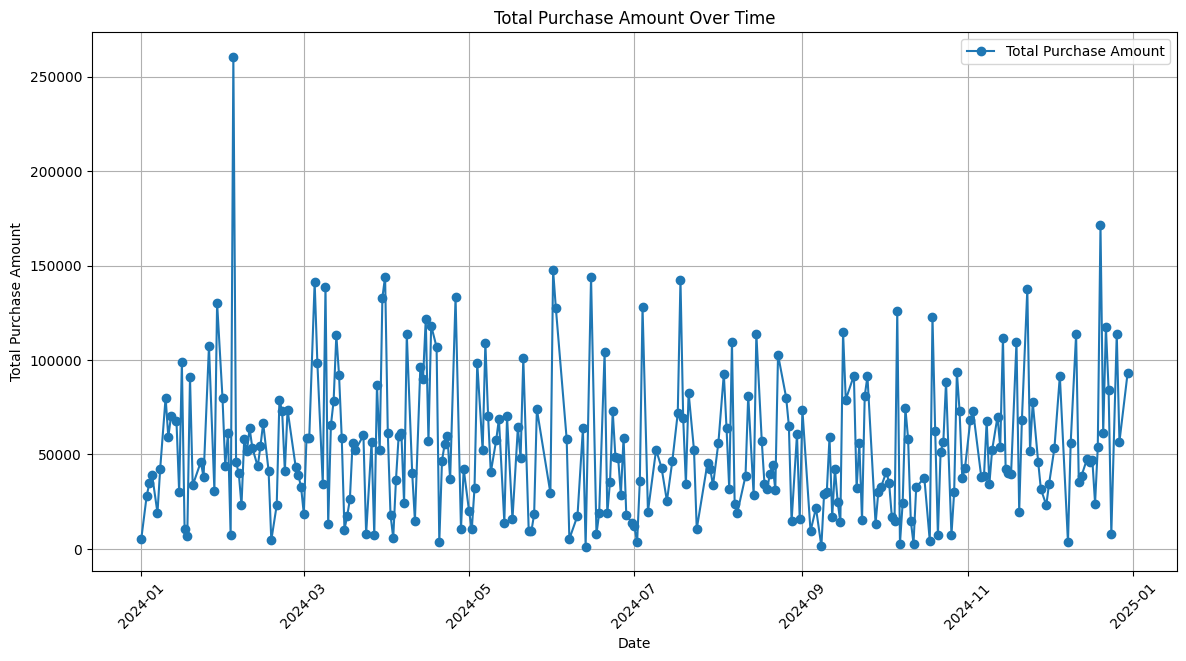

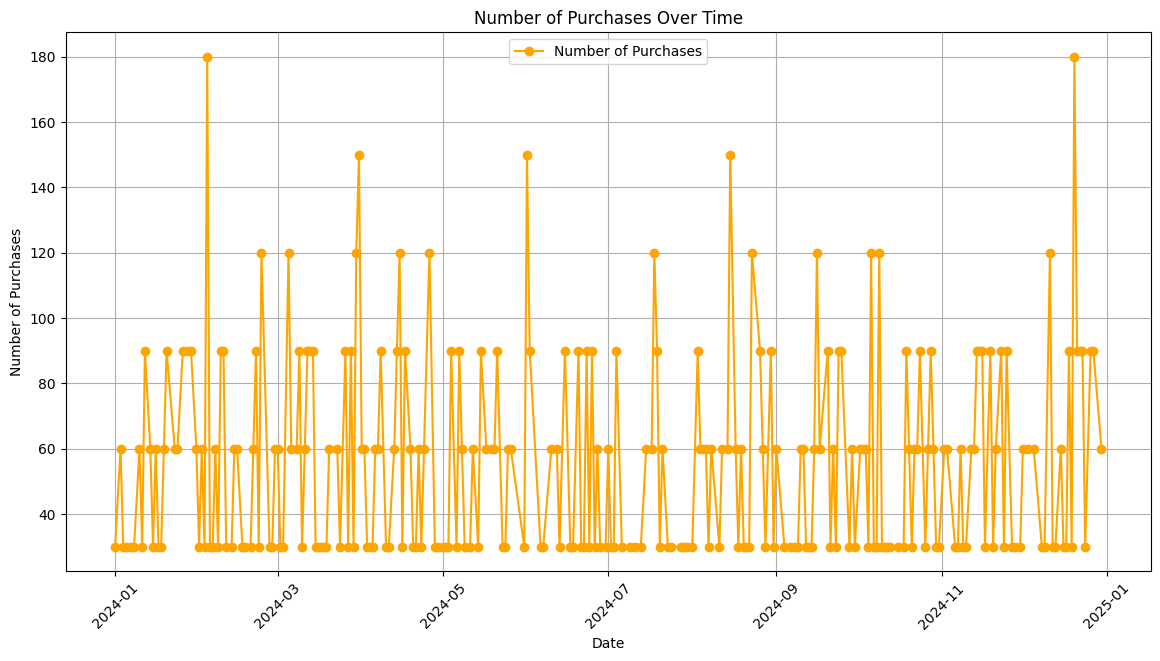

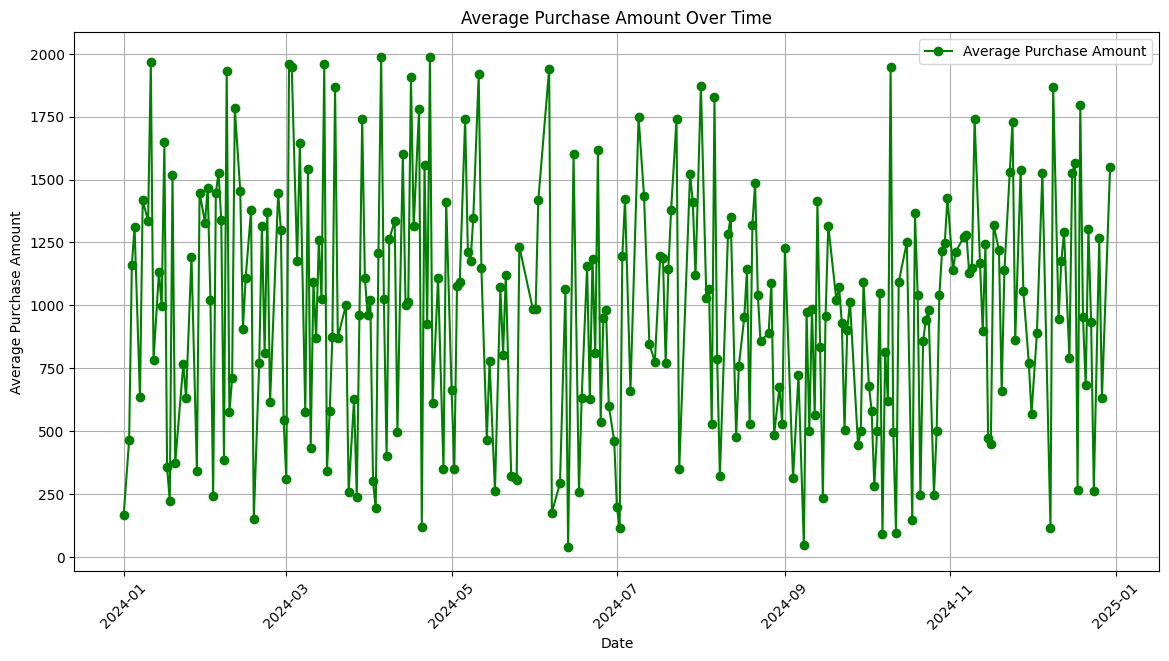

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the modified dataset
file_path_modified = 'customer_behavior_with_padded_search_queries.csv'
data_recommendation = pd.read_csv(file_path_modified)

# Convert purchase_date to datetime format
data_recommendation['purchase_date'] = pd.to_datetime(data_recommendation['purchase_date'])

# Aggregate data by date
purchase_trends = data_recommendation.groupby(data_recommendation['purchase_date'].dt.date).agg({
    'purchase_amount': ['sum', 'count', 'mean']
}).reset_index()

# Flatten the column names
purchase_trends.columns = ['purchase_date', 'total_purchase_amount', 'purchase_count', 'average_purchase_amount']

# Plot the total purchase amount over time
plt.figure(figsize=(14, 7))
plt.plot(purchase_trends['purchase_date'], purchase_trends['total_purchase_amount'], marker='o', linestyle='-', label='Total Purchase Amount')
plt.title('Total Purchase Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot the number of purchases over time
plt.figure(figsize=(14, 7))
plt.plot(purchase_trends['purchase_date'], purchase_trends['purchase_count'], marker='o', linestyle='-', color='orange', label='Number of Purchases')
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot the average purchase amount over time
plt.figure(figsize=(14, 7))
plt.plot(purchase_trends['purchase_date'], purchase_trends['average_purchase_amount'], marker='o', linestyle='-', color='green', label='Average Purchase Amount')
plt.title('Average Purchase Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


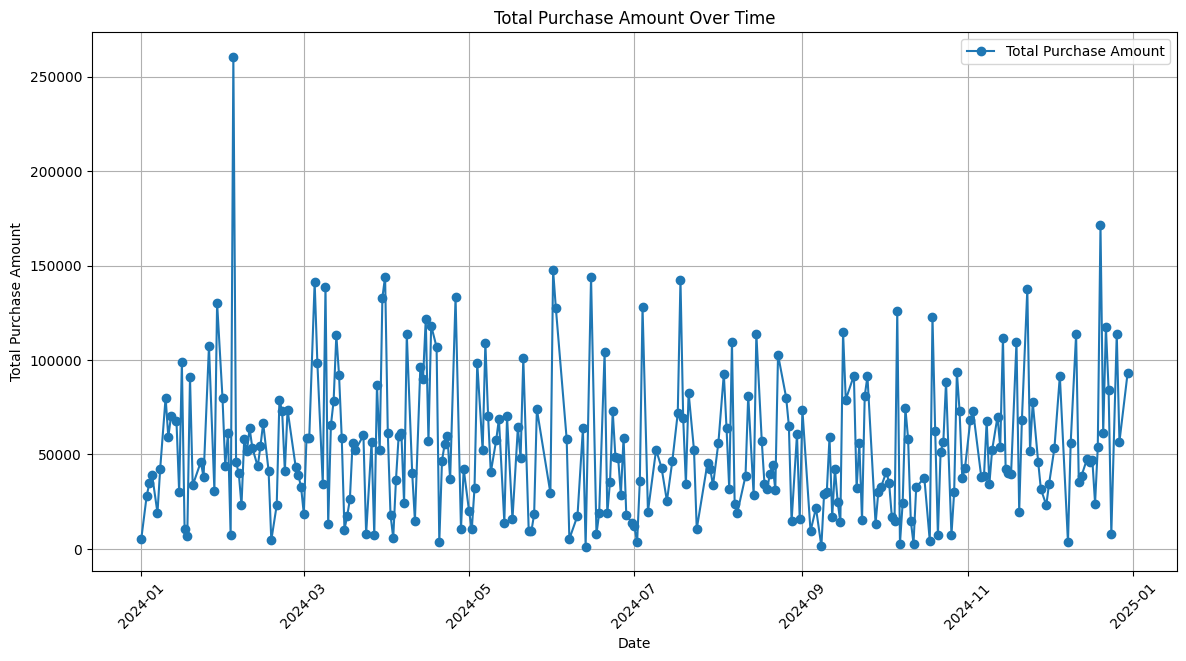

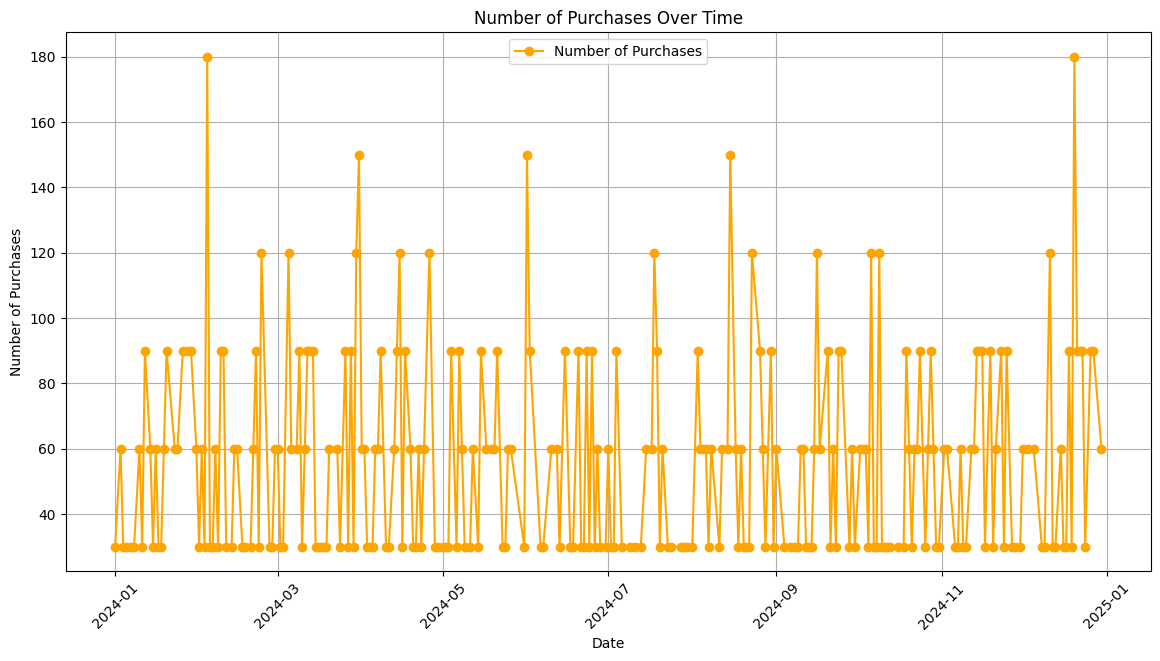

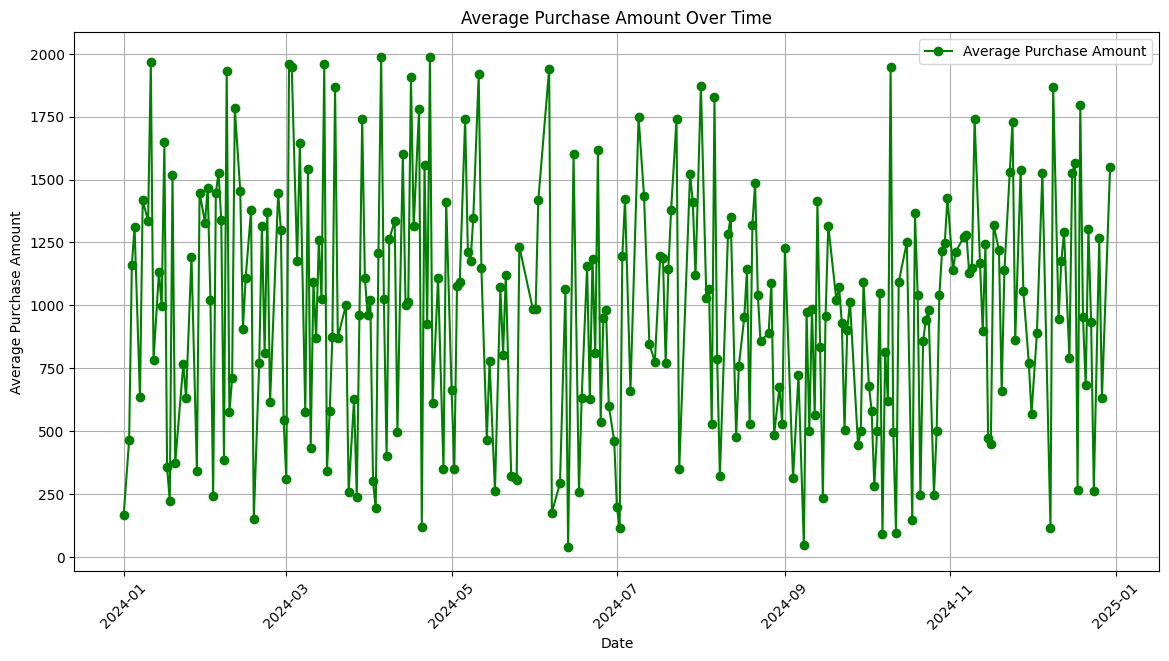

Aggregated Purchase Trends Data:
  purchase_date  total_purchase_amount  purchase_count  \
0    2024-01-01            5014.921372              30   
1    2024-01-03           27858.031159              60   
2    2024-01-04           34828.742317              30   
3    2024-01-05           39306.096316              30   
4    2024-01-07           19019.377148              30   

   average_purchase_amount  
0               167.164046  
1               464.300519  
2              1160.958077  
3              1310.203211  
4               633.979238  
Checking for missing values:
purchase_date              0
total_purchase_amount      0
purchase_count             0
average_purchase_amount    0
dtype: int64
Checking data types:
purchase_date               object
total_purchase_amount      float64
purchase_count               int64
average_purchase_amount    float64
dtype: object


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the modified dataset
file_path_modified = 'customer_behavior_with_padded_search_queries.csv'
data_recommendation = pd.read_csv(file_path_modified)

# Convert purchase_date to datetime format
data_recommendation['purchase_date'] = pd.to_datetime(data_recommendation['purchase_date'])

# Aggregate data by date
purchase_trends = data_recommendation.groupby(data_recommendation['purchase_date'].dt.date).agg({
    'purchase_amount': ['sum', 'count', 'mean']
}).reset_index()

# Flatten the column names
purchase_trends.columns = ['purchase_date', 'total_purchase_amount', 'purchase_count', 'average_purchase_amount']

# Plot the total purchase amount over time
plt.figure(figsize=(14, 7))
plt.plot(purchase_trends['purchase_date'], purchase_trends['total_purchase_amount'], marker='o', linestyle='-', label='Total Purchase Amount')
plt.title('Total Purchase Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot the number of purchases over time
plt.figure(figsize=(14, 7))
plt.plot(purchase_trends['purchase_date'], purchase_trends['purchase_count'], marker='o', linestyle='-', color='orange', label='Number of Purchases')
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot the average purchase amount over time
plt.figure(figsize=(14, 7))
plt.plot(purchase_trends['purchase_date'], purchase_trends['average_purchase_amount'], marker='o', linestyle='-', color='green', label='Average Purchase Amount')
plt.title('Average Purchase Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Display the aggregated data
print("Aggregated Purchase Trends Data:")
print(purchase_trends.head())

# Validate the model by checking for anomalies or inconsistencies
print("Checking for missing values:")
print(purchase_trends.isnull().sum())

print("Checking data types:")
print(purchase_trends.dtypes)


In [39]:
pip install joblib


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import joblib
import scipy.sparse as sp

# Load the modified dataset
file_path_modified = 'customer_behavior_with_padded_search_queries.csv'
data_recommendation = pd.read_csv(file_path_modified)

# Simulate additional product and user data
num_unique_products = len(data_recommendation['product_id'].unique())
num_unique_customers = len(data_recommendation['customer_id'].unique())

product_data = pd.DataFrame({
    'product_id': data_recommendation['product_id'].unique(),
    'category': (['electronics', 'fashion', 'electronics', 'fashion', 'electronics'] * ((num_unique_products // 5) + 1))[:num_unique_products],
    'brand': (['brand_a', 'brand_b', 'brand_c', 'brand_d', 'brand_e'] * ((num_unique_products // 5) + 1))[:num_unique_products],
    'description': (['high quality', 'latest model', 'best seller', 'popular item', 'new arrival'] * ((num_unique_products // 5) + 1))[:num_unique_products]
})

user_data = pd.DataFrame({
    'customer_id': data_recommendation['customer_id'].unique(),
    'age': ( [25, 30, 35, 40, 45] * ((num_unique_customers // 5) + 1) )[:num_unique_customers],
    'gender': (['male', 'female', 'male', 'female', 'male'] * ((num_unique_customers // 5) + 1))[:num_unique_customers],
    'location': (['city_a', 'city_b', 'city_c', 'city_d', 'city_e'] * ((num_unique_customers // 5) + 1))[:num_unique_customers]
})

# Merge additional product data with the main dataset
data_recommendation = pd.merge(data_recommendation, product_data, on='product_id', how='left')

# Merge additional user data with the main dataset
data_recommendation = pd.merge(data_recommendation, user_data, on='customer_id', how='left')

# Combine text features to create item profiles
data_recommendation['combined_features'] = (
    data_recommendation['search_queries'] + ' ' +
    data_recommendation['review'] + ' ' +
    data_recommendation['category'] + ' ' +
    data_recommendation['brand'] + ' ' +
    data_recommendation['description']
)

# Vectorize the combined text features
vectorizer = TfidfVectorizer(stop_words='english')
item_profiles = vectorizer.fit_transform(data_recommendation['combined_features'])

# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = scaler.fit_transform(data_recommendation[['age']])

# Combine text and numerical features
item_profiles_combined = sp.hstack([item_profiles, sp.csr_matrix(numerical_features)])

# Create a dictionary to hold user profiles
user_profiles = {}

for customer_id in data_recommendation['customer_id'].unique():
    # Get all items the user has interacted with
    user_data = data_recommendation[data_recommendation['customer_id'] == customer_id]
    
    # Aggregate the item profiles for these items
    user_item_profiles = item_profiles_combined[user_data.index]
    
    # Compute the average profile for the user
    user_profile = user_item_profiles.mean(axis=0)
    
    # Store the user profile as an array
    user_profiles[customer_id] = user_profile.A.flatten()

# Function to recommend items for a user
def recommend_items(user_id, top_n=5):
    # Get the user's profile
    user_profile = user_profiles[user_id]
    
    # Compute the similarity between the user's profile and all item profiles
    similarities = cosine_similarity([user_profile], item_profiles_combined).flatten()
    
    # Get the top N items with the highest similarity scores
    top_item_indices = similarities.argsort()[-top_n*10:][::-1]  # Get more items initially to filter duplicates
    
    # Get product IDs for the top items and ensure they are unique
    recommended_product_ids = data_recommendation.iloc[top_item_indices]['product_id'].unique()
    
    return recommended_product_ids[:top_n]  # Return top N unique product IDs

# Generate recommendations for a sample customer
sample_customer_id = 1
recommended_product_ids = recommend_items(sample_customer_id)

# Get product details for the recommended product IDs and ensure they are unique
recommended_products_details = data_recommendation[data_recommendation['product_id'].isin(recommended_product_ids)][['product_id', 'search_queries', 'review', 'category', 'brand', 'description']].drop_duplicates(subset=['product_id'])

print(recommended_products_details)

      product_id   search_queries             review     category    brand  \
0              1     apple iphone  Excellent product  electronics  brand_a   
1800         349  adidas sneakers  Excellent product  electronics  brand_a   
5550          13   samsung galaxy  Excellent product  electronics  brand_a   
9600          87   samsung galaxy  Excellent product  electronics  brand_a   

       description  
0     high quality  
1800  high quality  
5550  high quality  
9600  high quality  


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_data, test_data = train_test_split(data_recommendation, test_size=0.2, random_state=42)


In [6]:
# Recreate item_profiles_combined using train_data
train_data['combined_features'] = (
    train_data['search_queries'] + ' ' +
    train_data['review'] + ' ' +
    train_data['category'] + ' ' +
    train_data['brand'] + ' ' +
    train_data['description']
)

# Vectorize the combined text features
vectorizer = TfidfVectorizer(stop_words='english')
item_profiles_train = vectorizer.fit_transform(train_data['combined_features'])

# Normalize numerical features
scaler = MinMaxScaler()
numerical_features_train = scaler.fit_transform(train_data[['age']])

# Combine text and numerical features
item_profiles_combined_train = sp.hstack([item_profiles_train, sp.csr_matrix(numerical_features_train)])

# Create user profiles from training data
user_profiles_train = {}

for customer_id in train_data['customer_id'].unique():
    user_data = train_data[train_data['customer_id'] == customer_id]
    user_item_profiles = item_profiles_combined_train[user_data.index]
    user_profile = user_item_profiles.mean(axis=0)
    user_profiles_train[customer_id] = user_profile.A.flatten()

# Generate recommendations for test data
def recommend_items_for_test(user_id, top_n=5):
    user_profile = user_profiles_train[user_id]
    similarities = cosine_similarity([user_profile], item_profiles_combined_train).flatten()
    top_item_indices = similarities.argsort()[-top_n*10:][::-1]
    recommended_product_ids = train_data.iloc[top_item_indices]['product_id'].unique()
    return recommended_product_ids[:top_n]

test_data['recommended_product_ids'] = test_data['customer_id'].apply(lambda x: recommend_items_for_test(x) if x in user_profiles_train else [])


IndexError: index (12149) out of range